# Importing important liberaries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython import display
%matplotlib inline

# Busines and data understanding 
I'll be working with the __Reviews__ and __Listing__ data from __Airbnb__ for __[Seattle](https://www.kaggle.com/datasets/airbnb/seattle)__ and __[Boston](https://www.kaggle.com/datasets/airbnb/boston)__ downloaded from __[Kaggle](https://www.kaggle.com/datasets/airbnb/)__ to try to answer the following questions:
1.  What are the most common themes in guest reviews, and how do they correlate with review scores?
3.  What are the seasonal patterns in listing prices and availability in Boston?
4.  How much are Airbnb homes earning in certain time frames and areas? 

Positive reviews might highlight cleanliness, responsiveness, or convenience, while negative reviews might mention noise or poor communication. Price, amenities, location, and host responsiveness might significantly impact review scores. Prices and demand increase during peak tourist seasons or significant events.

## Data preprocessing for the Reviews:
Let's clean and preprocess textual data by removing stopwords, punctuation, and special characters. Then, we will use natural language processing (NLP) techniques, like TF-IDF or sentiment analysis, to extract meaningful insights.

In [55]:
import nltk
from nltk.corpus import stopwords
import re

df_reviews_s = pd.read_csv('data/airbnb/seattle/reviews.csv')
df_reviews_b = pd.read_csv('data/airbnb/boston/reviews.csv')

print(f"Features of the Review data for Seattle:\n {df_reviews_s.head()}")
print(f"Features of the Review data for Boston:\n {df_reviews_b.head()}")

Features of the Review data for Seattle:
    listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
Features of the Review data for Boston:
    listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlott

In [74]:
# Check the missing data. The following will check the missing values in each column. 
# But this will not affect what we are trying to do.
print("Missing data in Seattle reviews:")
print(df_reviews_s.isnull().sum())

print("\nMissing data in Boston reviews:")
print(df_reviews_b.isnull().sum())


Missing data in Seattle reviews:
listing_id           0
id                   0
date                 0
reviewer_id          0
reviewer_name        0
comments            18
cleaned_comments     0
dtype: int64

Missing data in Boston reviews:
listing_id           0
id                   0
date                 0
reviewer_id          0
reviewer_name        0
comments            53
cleaned_comments     0
dtype: int64


In [58]:
nltk.download('stopwords')

def clean_text(text):
    # Remove punctuation and special characters
    #print(f"Data before removing punctuations and special characters:\n {text}")
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #print(f"Data after removing punctuations and special characters:\n {text}")
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdualazem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Clean the comment:

df_reviews_s['cleaned_comments'] = df_reviews_s['comments'].apply(lambda x: clean_text(str(x)))
df_reviews_b['cleaned_comments'] = df_reviews_b['comments'].apply(lambda x: clean_text(str(x)))

Let's find the most frequently occurring words in the "cleaned_comments" column to understand the themes that guests often mention.

In [75]:
from collections import Counter

# Split all cleaned comments into words and count word frequency
words_s = ' '.join(df_reviews_s['cleaned_comments']).split()
words_b = ' '.join(df_reviews_b['cleaned_comments']).split()
word_counts_s = Counter(words_s)
word_counts_b = Counter(words_b)

# Display the most common words
common_words_s = word_counts_s.most_common(20)
common_words_b = word_counts_b.most_common(20)

print(f"Word and counts for Seattle:\n {common_words_s}")
print(f"Word and counts for Boston:\n {common_words_b}")


Word and counts for Seattle:
 [('great', 60760), ('stay', 51979), ('place', 45400), ('seattle', 39504), ('us', 31835), ('clean', 29118), ('location', 28539), ('would', 26127), ('apartment', 25831), ('comfortable', 25037), ('nice', 23044), ('house', 22718), ('host', 20715), ('room', 20701), ('home', 20227), ('everything', 19714), ('neighborhood', 18121), ('easy', 17937), ('time', 17767), ('recommend', 16449)]
Word and counts for Boston:
 [('great', 40243), ('stay', 35383), ('boston', 32012), ('place', 30330), ('apartment', 28310), ('clean', 23014), ('location', 22852), ('us', 21556), ('room', 19975), ('nice', 18912), ('would', 18826), ('host', 17661), ('comfortable', 15877), ('house', 14407), ('everything', 13832), ('easy', 12948), ('really', 12599), ('recommend', 12463), ('time', 12259), ('good', 11497)]


### Visualise the words
We should look at the frequesnt word used in the review and visulaise them to get a sense of what's the general mood. 

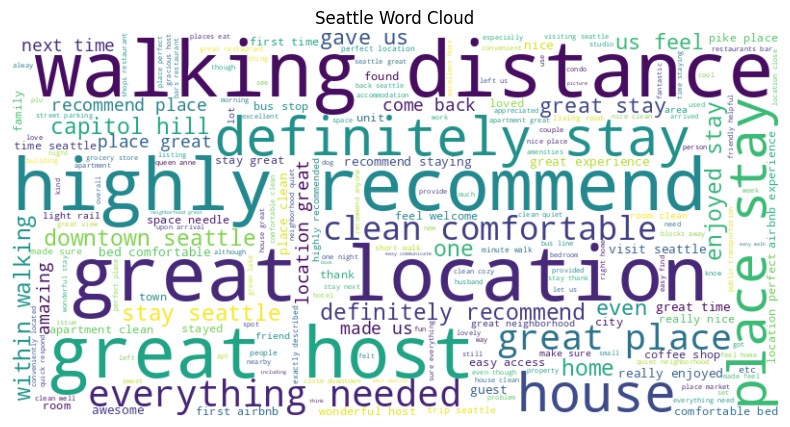

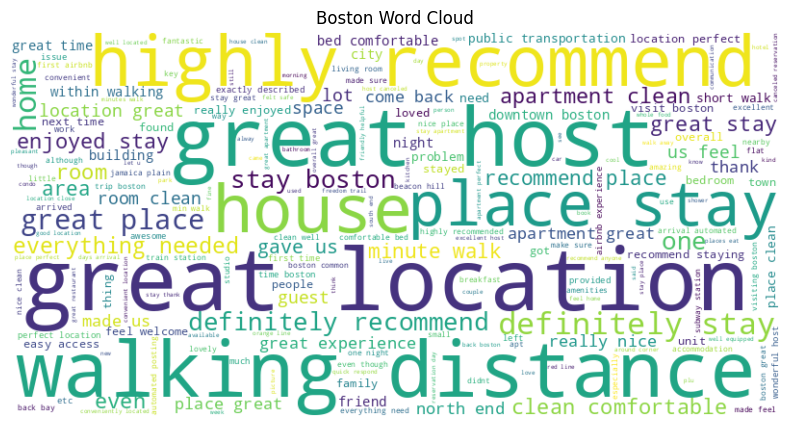

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_s = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_s))
wordcloud_b = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words_b))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_s, interpolation='bilinear')
plt.axis('off')
plt.title("Seattle Word Cloud")
plt.savefig('./plots/seattle_wordcloud.png')
plt.show()

# Plot Boston word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.title("Boston Word Cloud")
plt.savefig('./plots/boston_wordcloud.png')  # Save the figure
plt.show()

## Average review length
Let's analyse the average length of reviews to understand guest engagement and possibly segment reviews based on length.

In [83]:
df_reviews_s['review_length'] = df_reviews_s['cleaned_comments'].apply(lambda x: len(x.split()))
avg_length_s = df_reviews_s['review_length'].mean()

df_reviews_b['review_length'] = df_reviews_b['cleaned_comments'].apply(lambda x: len(x.split()))
avg_length_b = df_reviews_b['review_length'].mean()

print(f"Seattle average review length: {avg_length_s:.2f} words")
print(f"Boston average review length: {avg_length_b:.2f} words")

Seattle average review length: 35.64 words
Boston average review length: 33.19 words


## Sentiment analysis
Sentiment analysis aims to determine whether reviews are generally positive, neutral, or negative. For this, we can use TextBlob or VADER, which are famous for sentiment analysis on English text data.

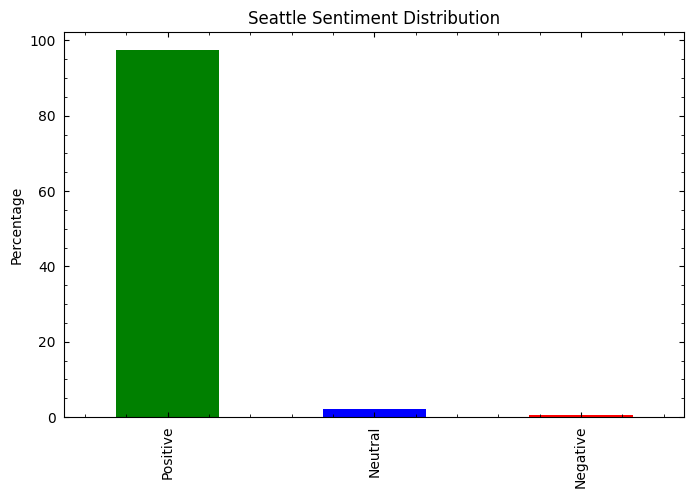

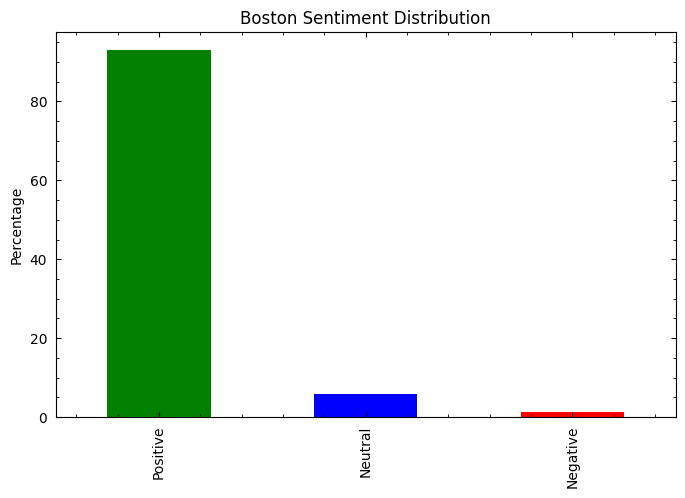

In [98]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)

# Apply sentiment analysis
df_reviews_s['sentiment_score'] = df_reviews_s['cleaned_comments'].apply(get_sentiment)
df_reviews_b['sentiment_score'] = df_reviews_b['cleaned_comments'].apply(get_sentiment)

# Classify sentiment as Positive, Negative, or Neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews_s['sentiment'] = df_reviews_s['sentiment_score'].apply(classify_sentiment)
df_reviews_b['sentiment'] = df_reviews_b['sentiment_score'].apply(classify_sentiment)

# Display sentiment distribution
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
sentiment_counts_s = df_reviews_s['sentiment'].value_counts(normalize=True)*100
sentiment_counts_s.plot(kind='bar', color=['green', 'blue', 'red'], figsize=(8, 5))
plt.title('Seattle Sentiment Distribution')
plt.ylabel('Percentage')
plt.xlabel('')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.tick_params(axis='x', pad=6)  
ax0.tick_params(axis='y', pad=6)  
ax0.minorticks_on()
plt.savefig('./plots/seattle_sentiment.png')
plt.show()

gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
sentiment_counts_b = df_reviews_b['sentiment'].value_counts(normalize=True)*100
sentiment_counts_b.plot(kind='bar', color=['green', 'blue', 'red'], figsize=(8, 5))
plt.title('Boston Sentiment Distribution')
plt.ylabel('Percentage')
plt.xlabel('')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.tick_params(axis='x', pad=6)  
ax0.tick_params(axis='y', pad=6)  
ax0.minorticks_on()
plt.savefig('./plots/boston_sentiment.png')
plt.show()

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Step 1: Keyword Analysises
threshold = 0.20  # You can adjust this based on your dataset

# Create a high/low rating column based on sentiment score
df_reviews_s['high_rating'] = df_reviews_s['sentiment_score'] >= threshold
df_reviews_b['high_rating'] = df_reviews_b['sentiment_score'] >= threshold

correlation_s = df_reviews_s['review_length'].corr(df_reviews_s['sentiment_score'])
correlation_b = df_reviews_b['review_length'].corr(df_reviews_b['sentiment_score'])

print("Seattle correlation between review length and sentiment score:", correlation_s)
print("Boston correlation between review length and sentiment score:", correlation_b)

Seattle correlation between review length and sentiment score: -0.2693102578880889
Boston correlation between review length and sentiment score: -0.28538854090973653


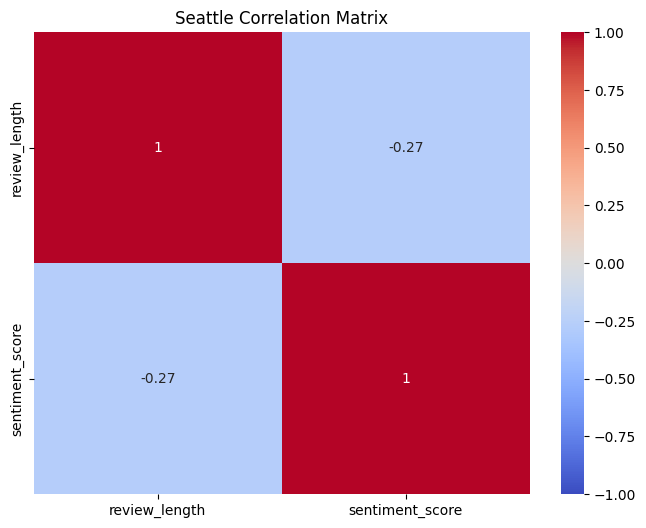

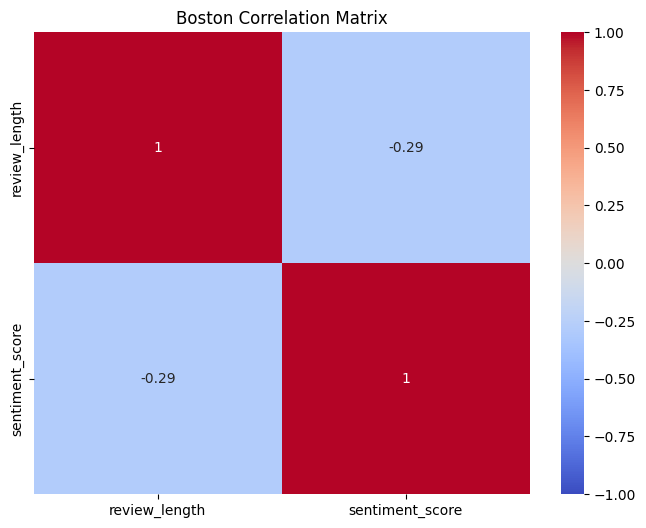

In [102]:
import seaborn as sns

# Select only the numerical columns for the correlation matrix
numeric_df_s = df_reviews_s[['review_length', 'sentiment_score']]
numeric_df_b = df_reviews_b[['review_length', 'sentiment_score']]

# Compute the correlation matrix
correlation_matrix_s = numeric_df_s.corr()
correlation_matrix_b = numeric_df_b.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_s, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Seattle Correlation Matrix")
plt.savefig('./plots/boston_correlation.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_b, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Boston Correlation Matrix")
plt.savefig('./plots/boston_correlation.png')
plt.show()